https://colab.research.google.com/drive/19rymVB11AYtNPOZjK8dcVPrHpyh5tvYX

# CNN to improve accuracy in case of image translation

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical

In [0]:
from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[1],1 ).astype('float32')
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[1],1).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
model = Sequential()
model.add(Conv2D(10, (3,3), input_shape=(28, 28,1),
activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              1691000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 1,701,110
Trainable params: 1,701,110
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=20, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.4631 - acc: 0.8708 - val_loss: 0.2108 - val_acc: 0.9378
Epoch 2/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.1788 - acc: 0.9478 - val_loss: 0.1359 - val_acc: 0.9614
Epoch 3/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.1202 - acc: 0.9653 - val_loss: 0.0987 - val_acc: 0.9716
Epoch 4/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0873 - acc: 0.9745 - val_loss: 0.0870 - val_acc: 0.9740
Epoch 5/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0687 - acc: 0.9798 - val_loss: 0.0702 - val_acc: 0.9782
Epoch 6/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0536 - acc: 0.9843 - val_loss: 0.0575 - val_acc: 0.9807
Epoch 7/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0452 - acc: 0.9868 - val_loss: 0.0543 - val_acc

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


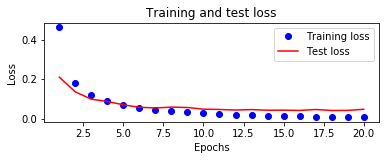

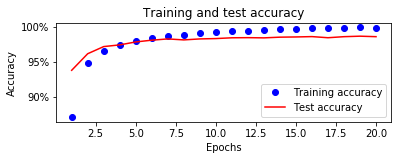

In [0]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [0]:
X_test1 = X_test[y_test[:,1]==1]
X_test1.shape

(1135, 28, 28, 1)

In [0]:
import numpy as np
np.max(X_test1)

1.0

In [0]:
import numpy as np
pic=np.zeros((28,28))
pic2=np.copy(pic)
for i in range(X_test1.shape[0]):
    pic2=X_test1[i,:,:,0]
    pic=pic+pic2
pic=(pic/X_test1.shape[0])
for i in range(pic.shape[0]):
    if i<20:
        pic[:,i]=pic[:,i+1]

In [0]:
np.argmax(model.predict(pic.reshape(1,28,28,1)))

1

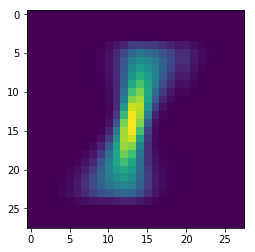

In [0]:
plt.imshow(pic)

In [0]:
np.max(pic)

0.9707350794045411

In [0]:
import numpy as np
pic=np.zeros((28,28))
pic2=np.copy(pic)
for i in range(X_test1.shape[0]):
    pic2=X_test1[i,:,:,0]
    pic=pic+pic2
pic=(pic/X_test1.shape[0])
for i in range(pic.shape[0]):
    if i<20:
        pic[:,i]=pic[:,i+2]

In [0]:
np.argmax(model.predict(pic.reshape(1,28,28,1)))

1